# Seminarski rad na temu Kvalitet podataka - prakticni deo

## Importovanje biblioteka

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox, yeojohnson






## Ucitavanje skupa podataka
Link: https://www.kaggle.com/datasets/anxods/world-population-and-forecast-dataset

In [30]:
df = pd.read_csv('world-forecast.csv')
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1645 non-null   object 
 1   Year                         1645 non-null   int64  
 2   Population                   1645 non-null   int64  
 3   YearlyChange%                1645 non-null   object 
 4   Yearly Change                1645 non-null   int64  
 5   Migrants (net)               1407 non-null   object 
 6   Median Age                   1407 non-null   float64
 7   Fertility Rate               1407 non-null   float64
 8   Density (P/Km²)              1645 non-null   int64  
 9   Urban  Pop %                 1645 non-null   object 
 10  Urban Population             1645 non-null   object 
 11  Country Share of  World Pop  1645 non-null   object 
 12  World Population             1645 non-null   int64  
 13  Rank              

,country,Year,Population,YearlyChange%,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.50%,902949,-62920,18.4,4.56,60,25.40%,9904337,0.50%,7794798739,37
1,Afghanistan,2025,43531519,2.26%,920635,-60000,19.9,4.56,67,26.90%,11704638,0.53%,8184437460,37
2,Afghanistan,2030,48093578,2.01%,912412,-66018,21.5,4.56,74,28.70%,13817897,0.56%,8548487400,35
3,Afghanistan,2035,52587408,1.80%,898766,-62359,23.2,4.56,81,31.00%,16279334,0.59%,8887524213,33
4,Afghanistan,2040,56912009,1.59%,864920,-62360,24.9,4.56,87,33.60%,19103637,0.62%,9198847240,32
5,Afghanistan,2045,60974113,1.39%,812421,-62216,26.6,4.56,93,36.50%,22228097,0.64%,9481803274,31
6,Afghanistan,2050,64682974,1.19%,741772,,28.4,4.56,99,39.40%,25498515,0.66%,9735033990,31
7,Albania,2020,2877797,-0.09%,-2543,-14000,36.4,1.62,105,63.50%,1827362,0.04%,7794798739,140
8,Albania,2025,2840464,-0.26%,-7467,-14000,38.4,1.62,104,68.60%,1948831,0.03%,8184437460,141
9,Albania,2030,2786974,-0.38%,-10698,-11000,40.7,1.62,102,73.10%,2038245,0.03%,8548487400,143


## Nedostajuce vrednosti

Procenat nedostajucih vrednosti po kolonama:
 Migrants (net)      26.626140
Median Age          14.468085
Fertility Rate      14.468085
Urban Population     5.835866
dtype: float64


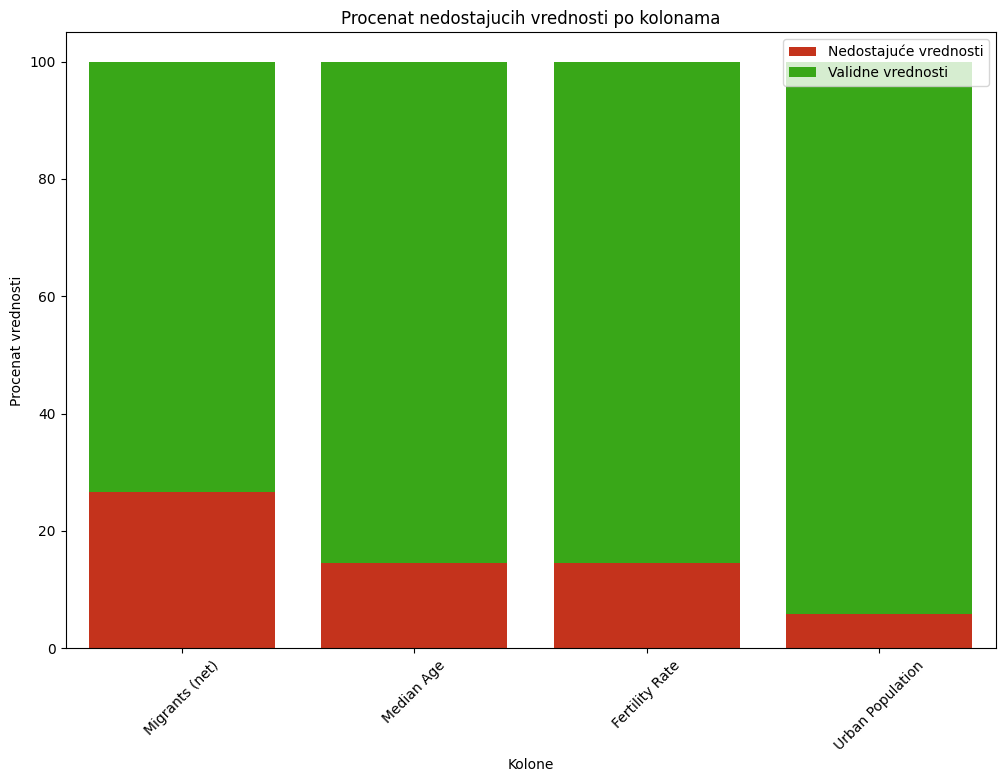

In [31]:
df['Urban Population'] = pd.to_numeric(df['Urban Population'], errors='coerce')
df['Migrants (net)'] = pd.to_numeric(df['Migrants (net)'], errors='coerce')

prerocessed_data = df.copy()

missing_values = prerocessed_data.isnull().mean() * 100
valid_values = 100 - missing_values

missing_values = missing_values[missing_values > 0]
print("Procenat nedostajucih vrednosti po kolonama:\n", missing_values)
valid_values = valid_values[missing_values.index]

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, color="#e01e00", label='Nedostajuće vrednosti')
sns.barplot(x=valid_values.index, y=valid_values.values, color="#2cbf00", bottom=missing_values.values, label='Validne vrednosti')

plt.xticks(rotation=45)
plt.title("Procenat nedostajucih vrednosti po kolonama")
plt.xlabel("Kolone")
plt.ylabel("Procenat vrednosti")
plt.legend(loc='upper right')
plt.show()




### Resavanje nedostajucih vrednosti

In [32]:

# Medijana
median_migrants = df['Migrants (net)'].median()
prerocessed_data['Migrants (net)'].fillna(median_migrants, inplace=True)

# Srednja vrednost(mean)
mean_median_age = df['Median Age'].mean()
prerocessed_data['Median Age'].fillna(mean_median_age, inplace=True)

median_fertility_rate = df['Fertility Rate'].median()
prerocessed_data['Fertility Rate'].fillna(median_fertility_rate, inplace=True)

median_urban_pop = df['Urban Population'].median()
prerocessed_data['Urban Population'].fillna(median_urban_pop, inplace=True)

missing_values = prerocessed_data.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
print("Procenat nedostajucih vrednosti po kolonama:\n", missing_values)




Procenat nedostajucih vrednosti po kolonama:
 Series([], dtype: float64)


## Duplikati

In [33]:
duplikati = prerocessed_data.duplicated()

print(f"Broj duplikata: {duplikati.sum()}")

prerocessed_data.describe()


Broj duplikata: 0


,Year,Population,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Population,World Population,Rank
count,1645.000000,1.645000e+03,1.645000e+03,1.645000e+03,1645.000000,1645.000000,1645.000000,1.645000e+03,1.645000e+03,1645.000000
mean,2035.000000,3.758928e+07,2.863657e+05,-2.734705e+02,34.334897,2.623356,526.148328,2.362894e+07,8.832990e+09,118.000000
std,10.003041,1.441284e+08,9.648423e+05,8.809116e+04,9.054083,1.173678,2598.095888,8.690704e+07,6.494685e+08,67.858671
min,2020.000000,7.950000e+02,-5.381416e+06,-6.532490e+05,15.200000,1.110000,0.000000,0.000000e+00,7.794799e+09,1.000000
25%,2025.000000,4.675190e+05,1.900000e+01,-5.000000e+03,27.300000,1.770000,42.000000,4.197000e+05,8.184437e+09,59.000000
50%,2035.000000,6.196675e+06,1.402900e+04,-1.000000e+03,34.334897,2.250000,104.000000,4.578933e+06,8.887524e+09,118.000000
75%,2045.000000,2.692071e+07,2.007860e+05,3.800000e+02,41.600000,3.050000,273.000000,1.521997e+07,9.481803e+09,177.000000
max,2050.000000,1.639176e+09,1.397040e+07,1.073911e+06,56.500000,6.950000,30874.000000,1.092037e+09,9.735034e+09,235.000000


## Raspodela podataka

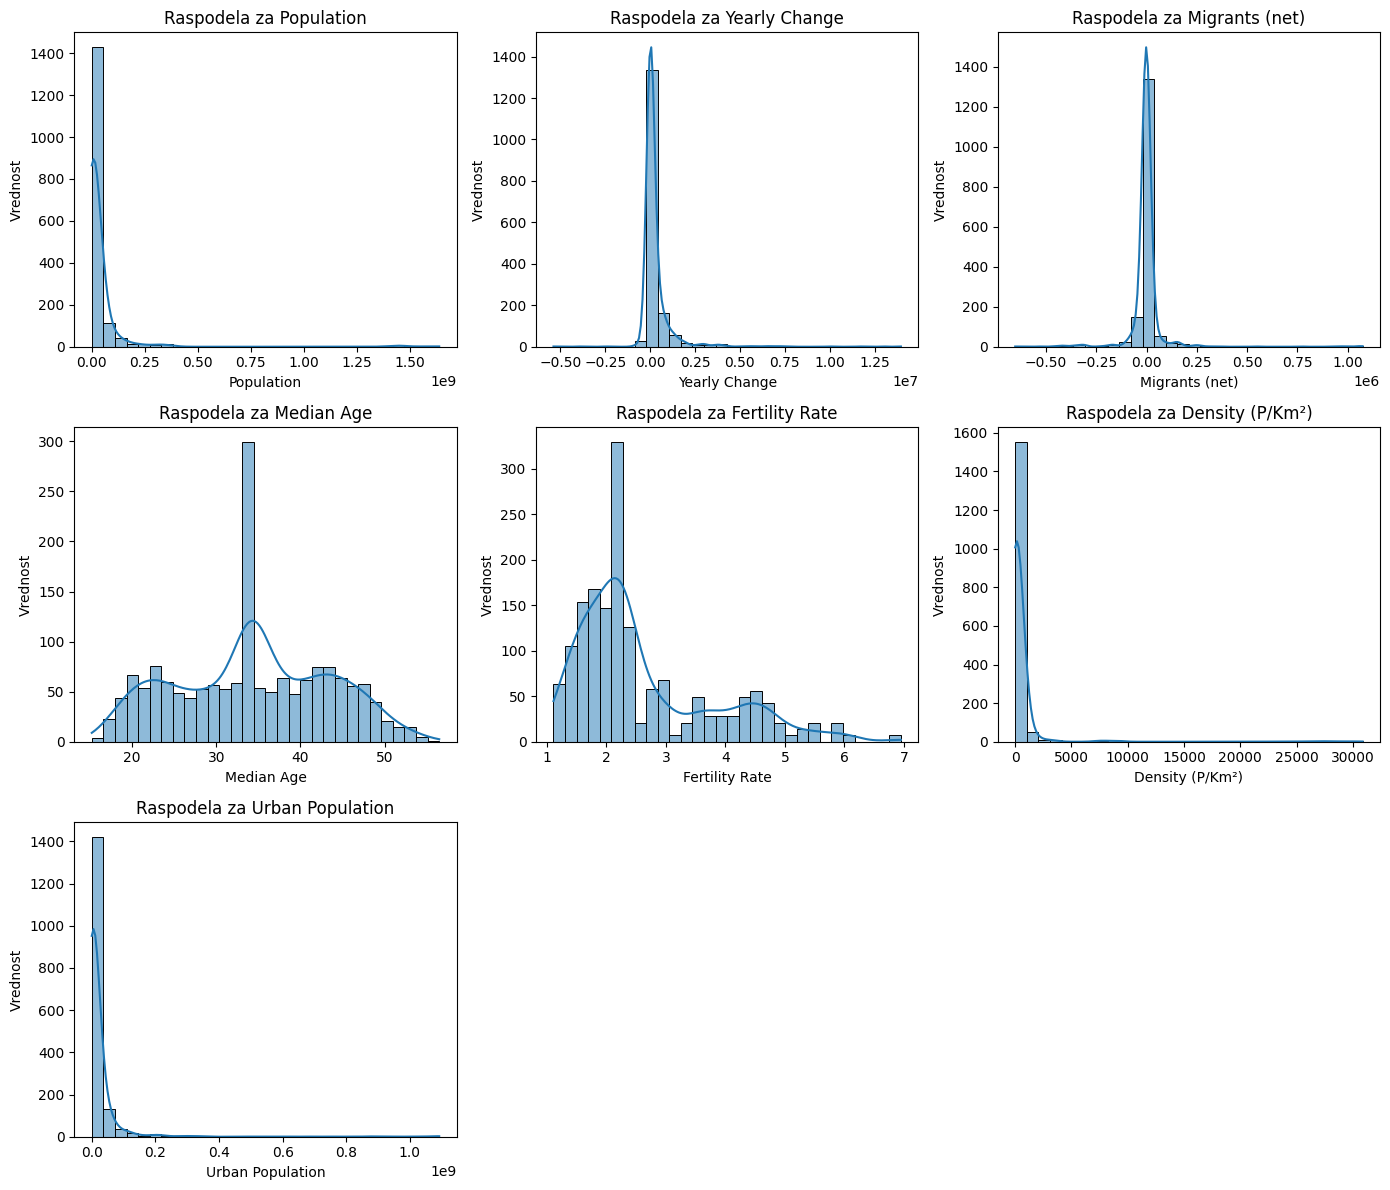

In [34]:
attributes = ['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban Population',]

num_cols = 3 
num_rows = (len(attributes) + num_cols - 1) // num_cols

plt.figure(figsize=(14, 4 * num_rows))  

for i, attr in enumerate(attributes):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.histplot(prerocessed_data[attr], bins=30, kde=True)
    plt.title(f'Raspodela za {attr}')
    plt.xlabel(attr)
    plt.ylabel('Vrednost')

plt.tight_layout()  
plt.show()


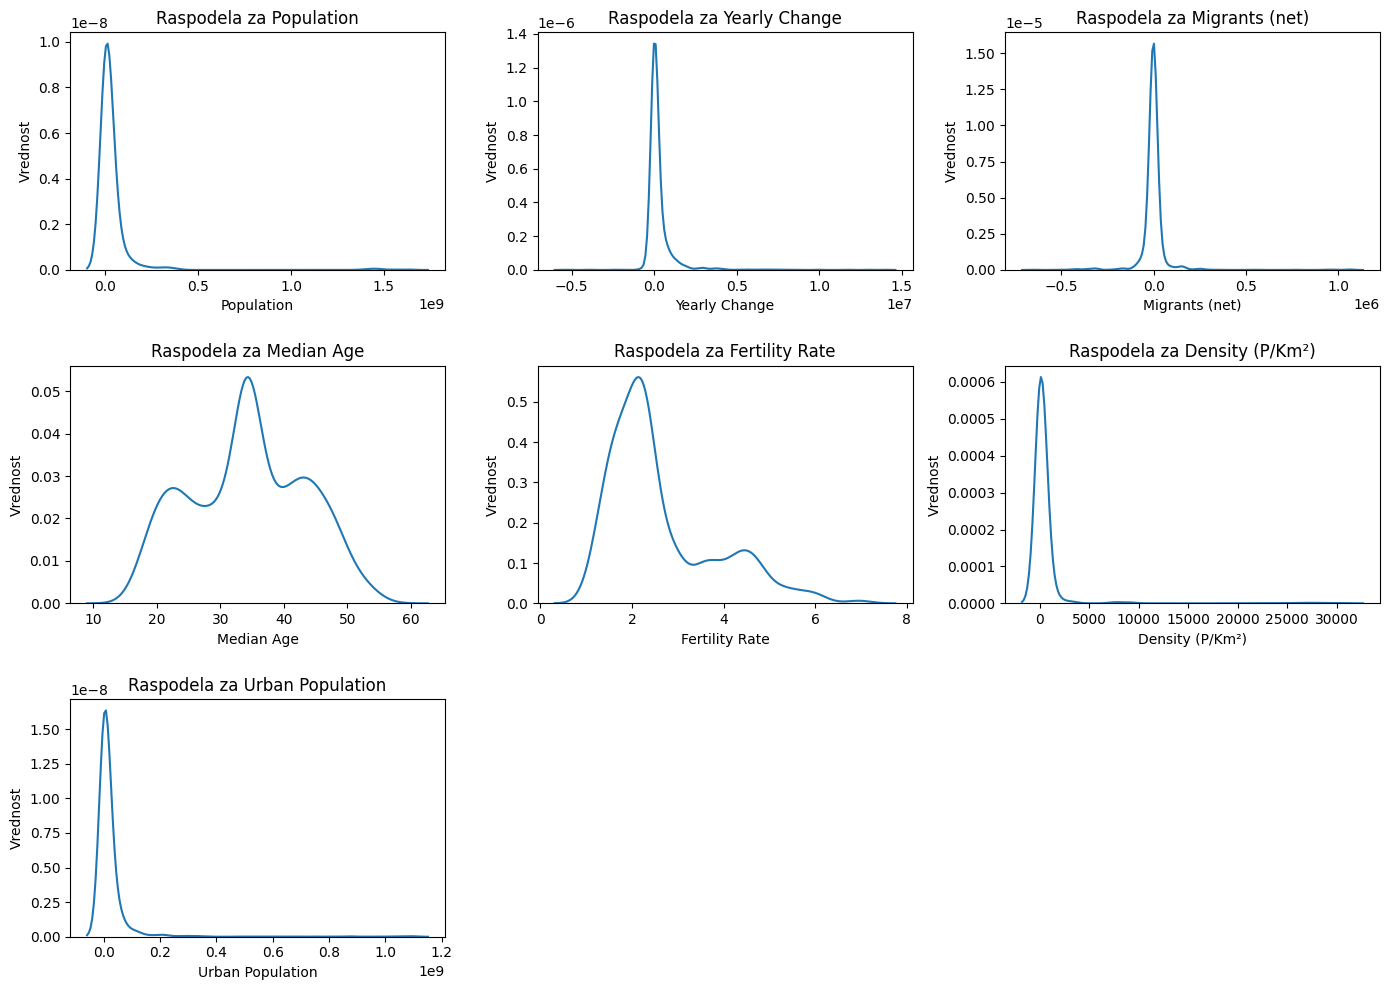

In [35]:

plt.figure(figsize=(14, 10))

for i, column in enumerate(attributes):
    plt.subplot(3, 3, i + 1)  
    sns.kdeplot(x=prerocessed_data[column].dropna(), data=prerocessed_data)  
    plt.title(f'Raspodela za {column}')
    plt.ylabel('Vrednost')

plt.tight_layout()
plt.show()

Na osnovu grafika primecujemo da je nad podacima moguce odraditi odredjene transformacije kako bi dobili sto pribliznije normalnu raspodelu.

       country  Year  Population YearlyChange%  Yearly Change  Migrants (net)  \
0  Afghanistan  2020   43.441077         2.50%     950.236286     -250.838594   
1  Afghanistan  2025   44.002862         2.26%     959.497264     -244.948974   
2  Afghanistan  2030   44.508731         2.01%     955.202596     -256.939682   
3  Afghanistan  2035   44.966102         1.80%     948.032700     -249.717841   
4  Afghanistan  2040   45.373893         1.59%     930.010753     -249.719843   

   Median Age  Fertility Rate  Density (P/Km²) Urban  Pop %  Urban Population  \
0   13.520637        1.000584         3.917009       25.40%         55.233401   
1   14.563589        1.000584         4.015434       26.90%         56.622244   
2   15.665462        1.000584         4.103989       28.70%         58.032889   
3   16.825200        1.000584         4.184458       31.00%         59.456522   
4   17.974513        1.000584         4.248021       33.60%         60.875603   

  Country Share of  World 

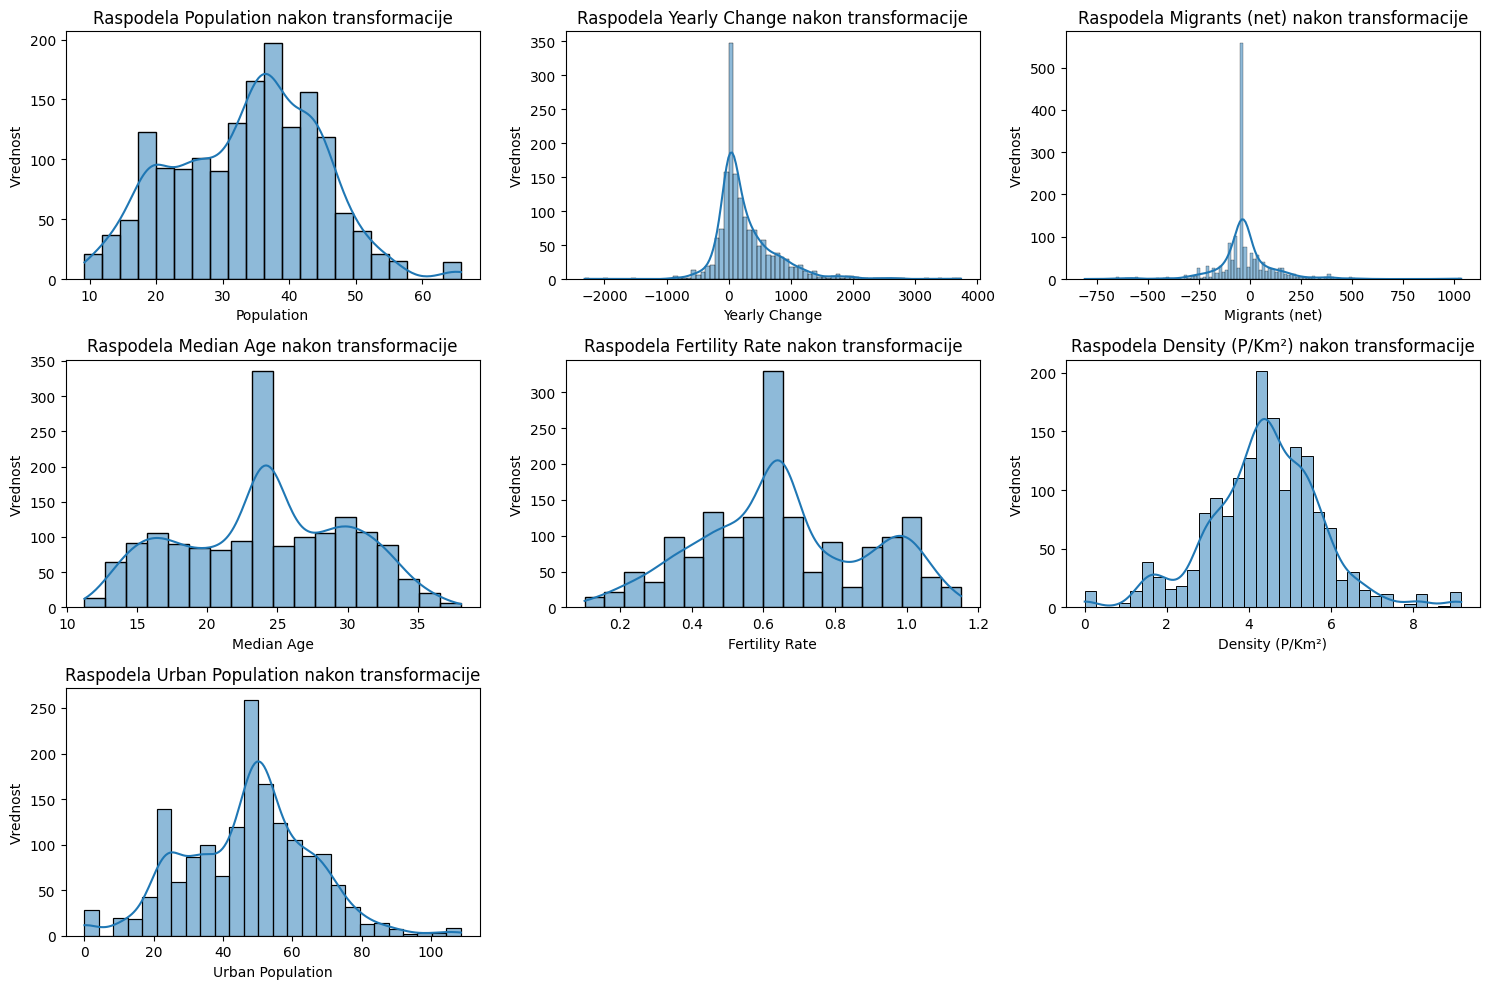

In [36]:
transformed_data = df.copy()

columns_to_transform = ['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban Population']

for column in columns_to_transform:
    if column in ['Yearly Change', 'Migrants (net)']:
         prerocessed_data[column] = np.sign(prerocessed_data[column]) * np.sqrt(np.abs(prerocessed_data[column]))
    else:
        if (prerocessed_data[column] > 0).all():
            prerocessed_data[column], _ = boxcox(prerocessed_data[column])
        else:
            prerocessed_data[column], _ = yeojohnson(prerocessed_data[column])


print(prerocessed_data.head())

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_transform):
    plt.subplot(3, 3, i + 1)
    sns.histplot(prerocessed_data[column], kde=True)
    plt.title(f'Raspodela {column} nakon transformacije')
    plt.ylabel('Vrednost')

plt.tight_layout()
plt.show()

Primecujemo da kolone 'Yearly Change', 'Migrants (net)' imaju negativne podatke, pa je za njihovu transformaciju koriscena metoda Kvadratni koren. Nad ostalim kolonama je primenjena Box-Cox transformacija, za one kolone koje nemaju negativne vrednosti ili vrednost nula, kao i Yeo-Johnson transformacija za ostale kolone.

## Mere centralne tendencije 

### Srednja vrednost

In [37]:
mean_values = prerocessed_data[['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 
                  'Density (P/Km²)', 'Urban Population', 'World Population']].mean()

print("\nSrednja vrednost po kolonama:\n", mean_values)


Srednja vrednost po kolonama:
 Population          3.367255e+01
Yearly Change       2.742346e+02
Migrants (net)     -2.145301e+01
Median Age          2.409694e+01
Fertility Rate      6.564989e-01
Density (P/Km²)     4.384601e+00
Urban Population    4.722284e+01
World Population    8.832990e+09
dtype: float64


### Medijana

In [38]:
median_values = prerocessed_data[['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 
                    'Density (P/Km²)', 'Urban Population', 'World Population']].median()

print("\nMedijana po kolonama:\n", median_values)


Medijana po kolonama:
 Population          3.498672e+01
Yearly Change       1.184441e+02
Migrants (net)     -3.162278e+01
Median Age          2.419519e+01
Fertility Rate      6.437858e-01
Density (P/Km²)     4.406534e+00
Urban Population    4.919725e+01
World Population    8.887524e+09
dtype: float64


### Moduo

In [39]:
country_mode = prerocessed_data['country'].mode().iloc[0]  
year_mode = prerocessed_data['Year'].mode().iloc[0]  
     
print(f"Najčešća država (Country): {country_mode}")
print(f"Najčešća godina (Year): {year_mode}")

Najčešća država (Country): Afghanistan
Najčešća godina (Year): 2020


## Mere dipserzije

In [40]:
numeric_columns = ['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 
                   'Density (P/Km²)', 'Urban Population']

### Opseg

In [41]:
range_values = prerocessed_data[numeric_columns].apply(lambda x: x.max() - x.min())

min_values = prerocessed_data[numeric_columns].min()
max_values = prerocessed_data[numeric_columns].max()

result_df = pd.DataFrame({
    'Min Vrednost': min_values,
    'Max Vrednost': max_values,
    'Opseg': range_values
})

print("\nMinimalne, Maksimalne vrednosti i Opseg po kolonama:\n", result_df)



Minimalne, Maksimalne vrednosti i Opseg po kolonama:
                   Min Vrednost  Max Vrednost        Opseg
Population            9.226764     65.770569    56.543805
Yearly Change     -2319.787921   3737.699292  6057.487214
Migrants (net)     -808.238207   1036.296772  1844.534980
Median Age           11.259127     38.071173    26.812046
Fertility Rate        0.101197      1.152229     1.051032
Density (P/Km²)       0.000000      9.168951     9.168951
Urban Population      0.000000    108.680729   108.680729


### Varijansa

In [42]:
variance_values = prerocessed_data[numeric_columns].var()
print("Varijansa:", variance_values)

Varijansa: Population             116.808005
Yearly Change       249796.031800
Migrants (net)       24831.523085
Median Age              34.602652
Fertility Rate           0.054307
Density (P/Km²)          1.908059
Urban Population       336.637631
dtype: float64


### Standardna devijacija

In [43]:
std_dev_values = prerocessed_data[numeric_columns].std()

print("\nStandardna devijacija po kolonama:\n", std_dev_values)


Standardna devijacija po kolonama:
 Population           10.807775
Yearly Change       499.795990
Migrants (net)      157.580212
Median Age            5.882402
Fertility Rate        0.233039
Density (P/Km²)       1.381325
Urban Population     18.347687
dtype: float64


### Interkvartilni raspon

In [44]:
Q1 = prerocessed_data[numeric_columns].quantile(0.25)
Q3 = prerocessed_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

print("\nInterkvartilni raspon (IQR) po kolonama:\n", IQR)


Interkvartilni raspon (IQR) po kolonama:
 Population           16.351015
Yearly Change       443.732610
Migrants (net)       90.204267
Median Age            9.258413
Fertility Rate        0.331512
Density (P/Km²)       1.657396
Urban Population     24.930953
dtype: float64


### Koeficijent varijacije

In [45]:
mean_values = prerocessed_data[numeric_columns].mean()
std_dev_values = prerocessed_data[numeric_columns].std()

cv_values = (std_dev_values / mean_values) * 100

print("\nKoeficijent varijacije (CV) po kolonama:\n", cv_values)


Koeficijent varijacije (CV) po kolonama:
 Population           32.096694
Yearly Change       182.251266
Migrants (net)     -734.536604
Median Age           24.411402
Fertility Rate       35.497265
Density (P/Km²)      31.504006
Urban Population     38.853419
dtype: float64


## Mere distribucije

### Iskosenost


Iskosenost po kolonama:
 Population          8.919755
Yearly Change       6.896379
Migrants (net)      4.296198
Median Age         -0.013317
Fertility Rate      1.006524
Density (P/Km²)     9.435596
Urban Population    8.709396
dtype: float64


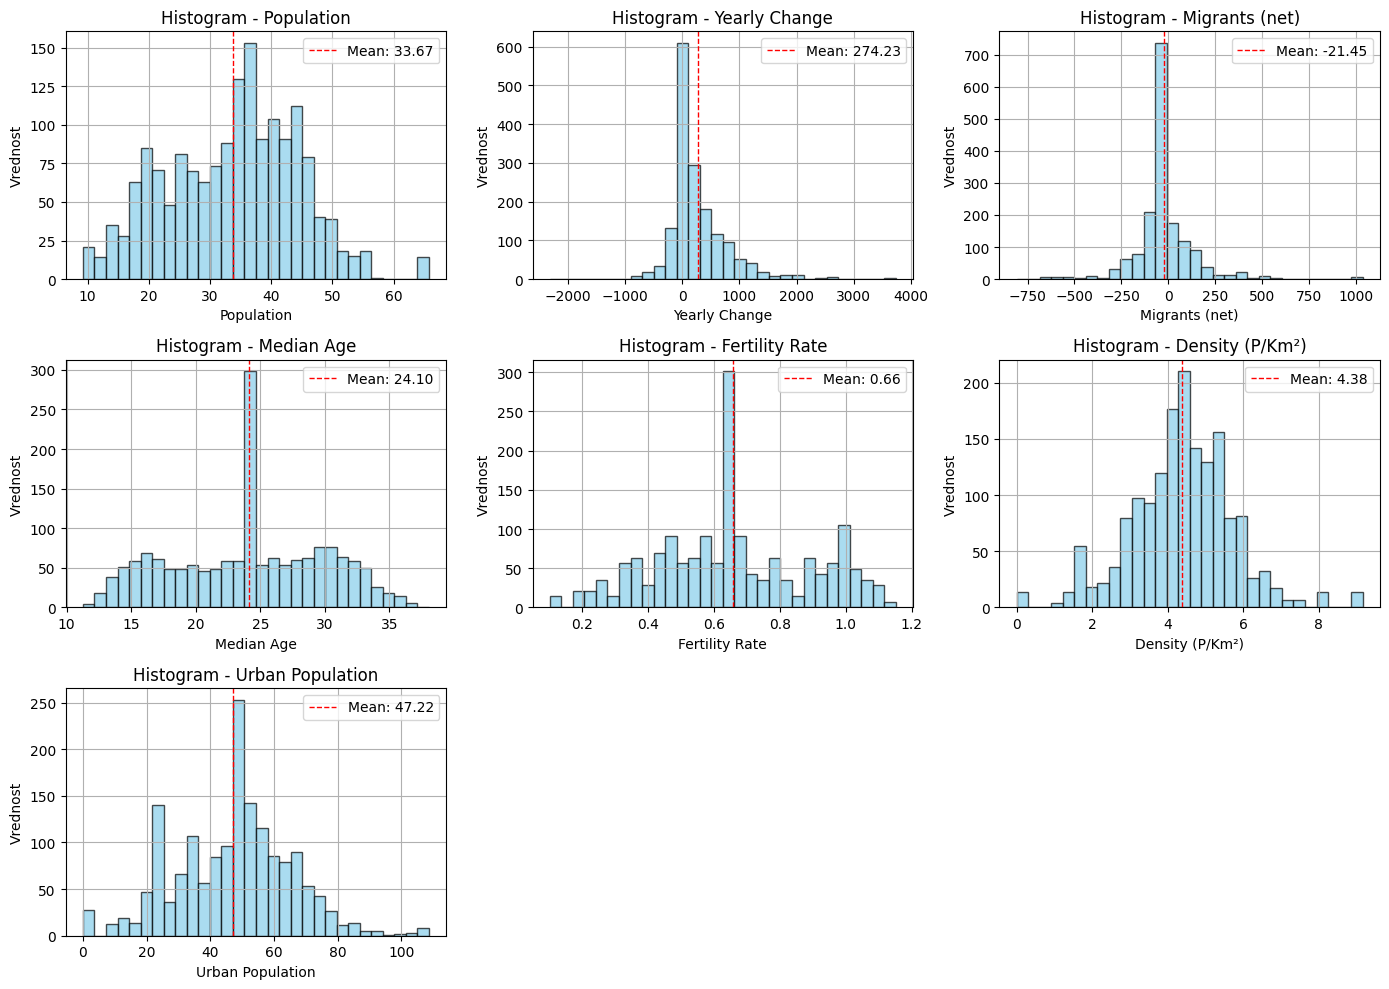

In [46]:
skewness_values = df[numeric_columns].skew()

print("\nIskosenost po kolonama:\n", skewness_values)

plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)  
    prerocessed_data[column].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    mean_value = prerocessed_data[column].mean()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Vrednost')
    plt.legend()

plt.tight_layout()
plt.show()

Iskosenost (skewness) meri asimetriju raspodele podataka u odnosu na srednju vrednost. Pozitivna iskosenost ukazuje na to da su podaci "duži" ili "teži" na desnoj strani, dok negativna iskosenost ukazuje na to da su podaci "duži" ili "teži" na levoj strani. Na grafiku je prikazana raspodela podataka, kao i crvena linija koja predstavlja srednju vrednost. Ova linija ce pomoci u indentifikovanju da li se radi o pozitivnoj ili negativnos iskosenosti.

### Kurtoza

In [47]:
kurtosis_values = prerocessed_data[numeric_columns].kurtosis()

print("\nKurtoza po kolonama:\n", kurtosis_values)


Kurtoza po kolonama:
 Population          -0.406674
Yearly Change        7.452933
Migrants (net)      10.020229
Median Age          -0.831673
Fertility Rate      -0.648756
Density (P/Km²)      1.216288
Urban Population     0.255091
dtype: float64


## Korelacija

### Pearsonova Korelacija

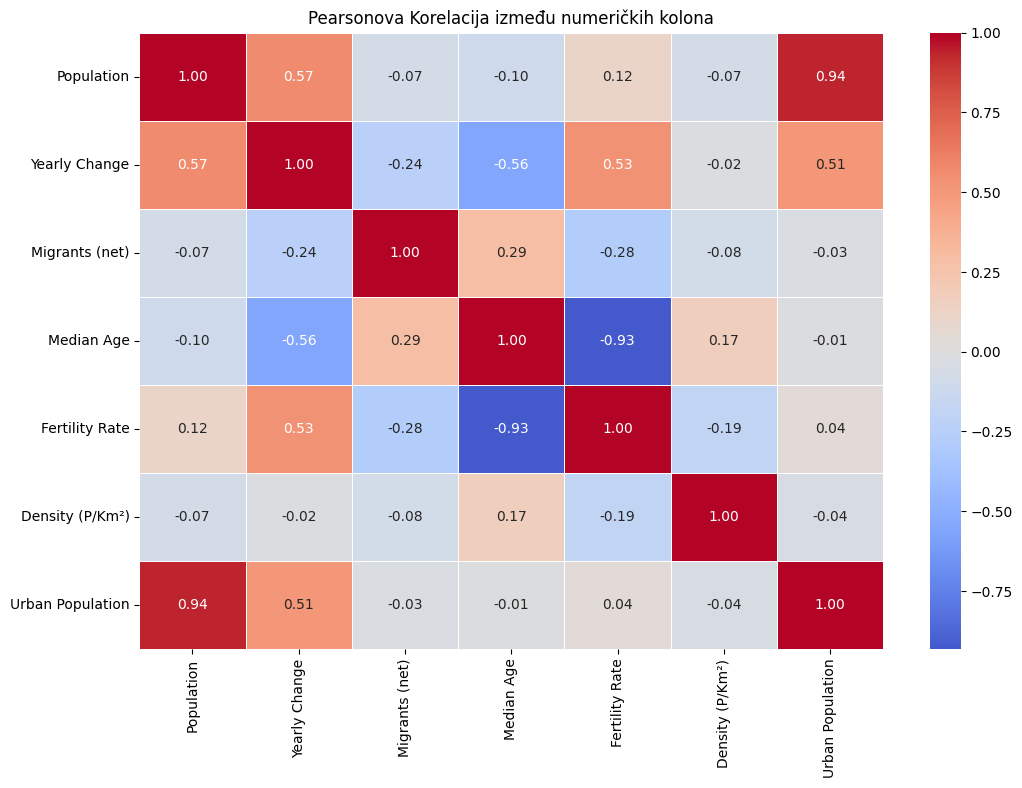

In [48]:
correlation_matrix = prerocessed_data[numeric_columns].corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Pearsonova Korelacija između numeričkih kolona')
plt.show()

### Spearmanova Korelacija

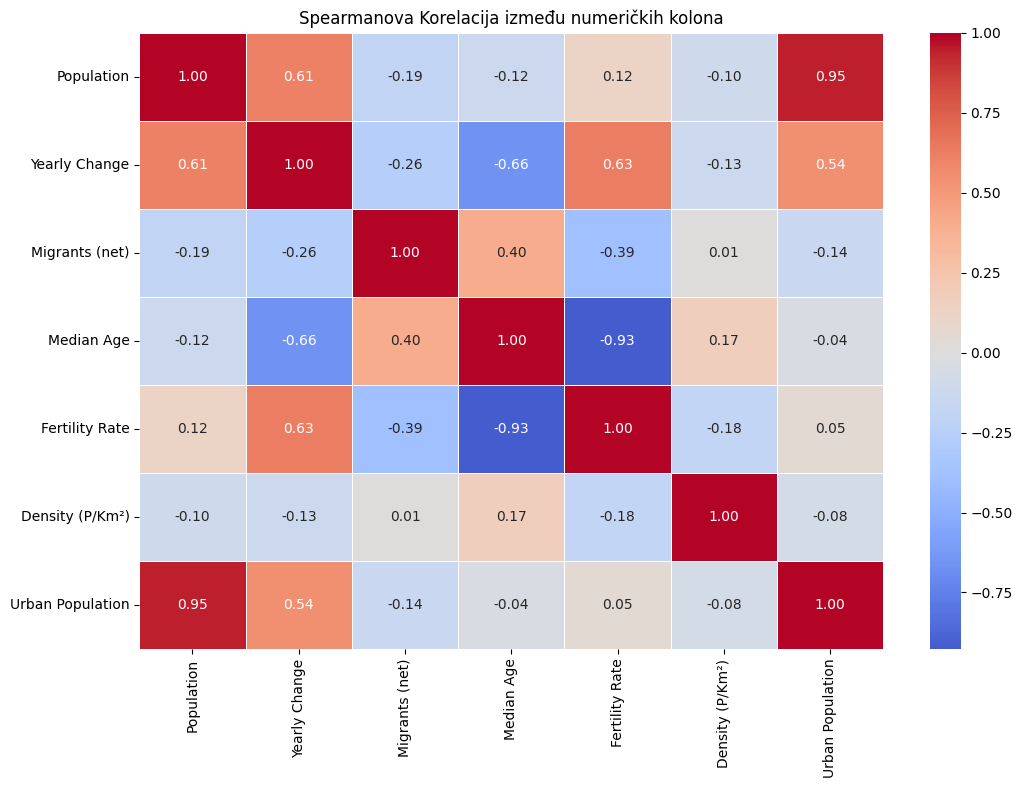

In [49]:
spearman_correlation_matrix = prerocessed_data[numeric_columns].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Spearmanova Korelacija između numeričkih kolona')
plt.show()

### Kendallova Korelacija

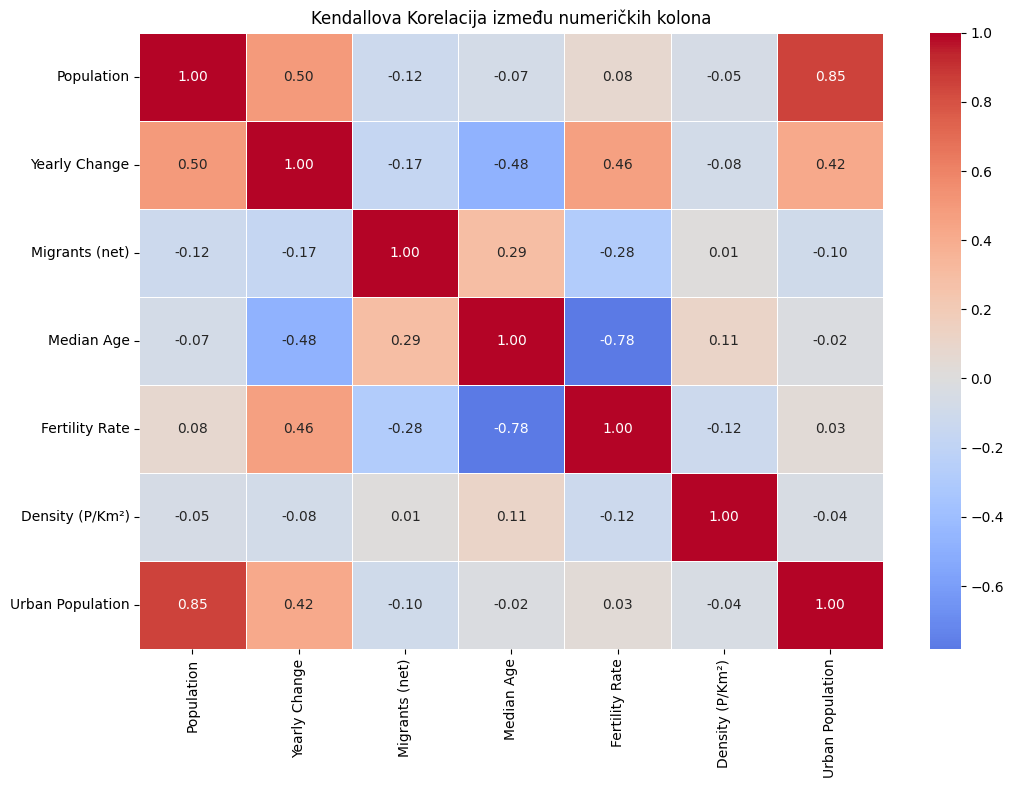

In [50]:
kendall_correlation_matrix = prerocessed_data[numeric_columns].corr(method='kendall')
plt.figure(figsize=(12, 8))
sns.heatmap(kendall_correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Kendallova Korelacija između numeričkih kolona')
plt.show()

Analizon korelacione matrice moze se primetiti da postoji visoka korelacija izmedju varijabli Population i Urban Poppulation, zatim izmedju Frtility Rate i Medium Age, kao i Yearly Change i Population. Kako ne bi doslo do multikolinearnosti moguce je ukloniti neku od ovih varijabli. U ovom slucaju to moze biti Urban Population.

In [51]:
prerocessed_data.drop('Urban Population', axis=1, inplace=True)
prerocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1645 non-null   object 
 1   Year                         1645 non-null   int64  
 2   Population                   1645 non-null   float64
 3   YearlyChange%                1645 non-null   object 
 4   Yearly Change                1645 non-null   float64
 5   Migrants (net)               1645 non-null   float64
 6   Median Age                   1645 non-null   float64
 7   Fertility Rate               1645 non-null   float64
 8   Density (P/Km²)              1645 non-null   float64
 9   Urban  Pop %                 1645 non-null   object 
 10  Country Share of  World Pop  1645 non-null   object 
 11  World Population             1645 non-null   int64  
 12  Rank                         1645 non-null   int64  
dtypes: float64(6), int

## Otklanjanje outlier-a

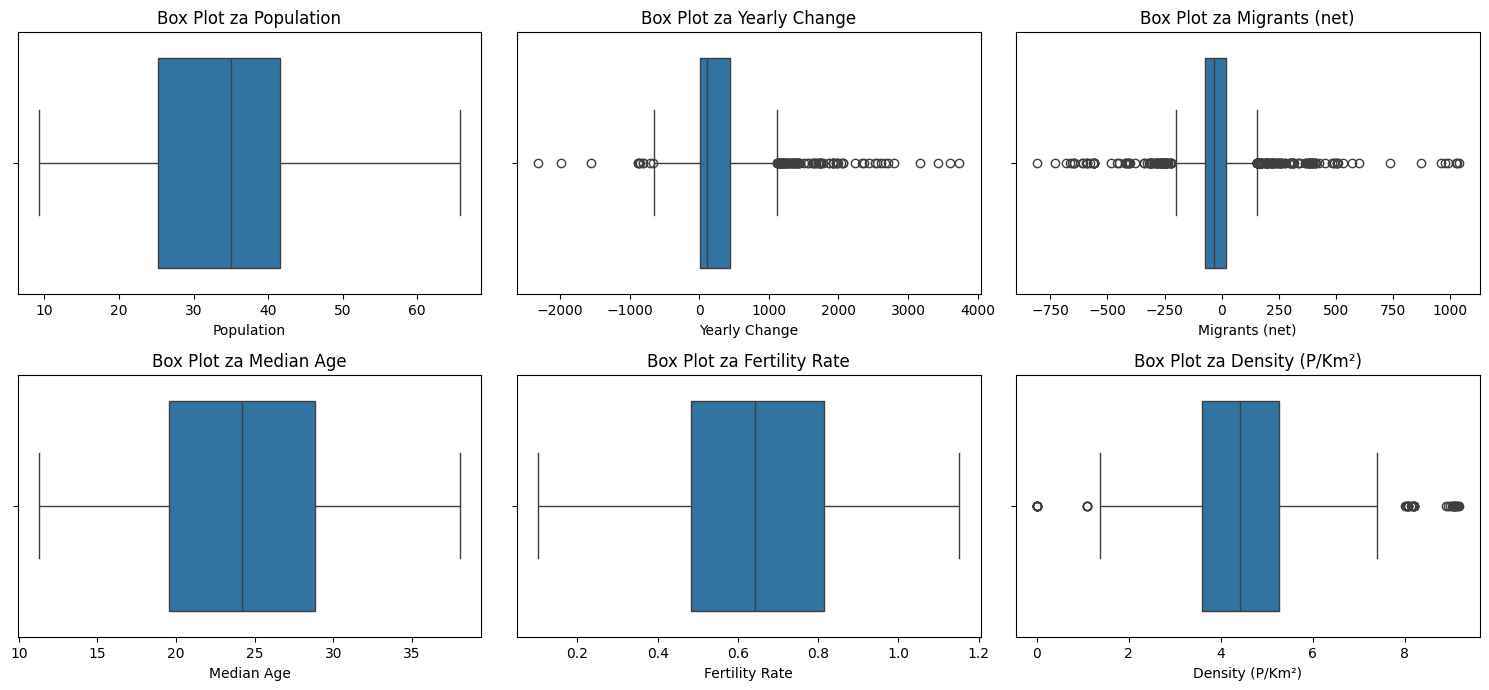

In [52]:
columns_to_plot = ['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=prerocessed_data, x=column)
    plt.title(f'Box Plot za {column}')

plt.tight_layout()
plt.show()

In [53]:
Q1 = df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = prerocessed_data[(df['Population'] < (Q1 - 1.5 * IQR)) | (df['Population'] > (Q3 + 1.5 * IQR))]
print("Outlier-i na osnovu IQR metode:\n", outliers_iqr)


Outlier-i na osnovu IQR metode:
          country  Year  Population YearlyChange%  Yearly Change  \
40        Angola  2045   46.326329         2.70%    1305.038697   
41        Angola  2050   46.990427         2.54%    1350.743869   
112   Bangladesh  2020   51.154872         1.06%    1298.699734   
113   Bangladesh  2025   51.416715         0.92%    1241.748364   
114   Bangladesh  2030   51.632388         0.75%    1148.458967   
...          ...   ...         ...           ...            ...   
1605     Vietnam  2030   48.593004         0.60%     781.880426   
1606     Vietnam  2035   48.704073         0.41%     653.083456   
1607     Vietnam  2040   48.780935         0.28%     547.526255   
1608     Vietnam  2045   48.837030         0.20%     470.320104   
1609     Vietnam  2050   48.872465         0.13%     375.226598   

      Migrants (net)  Median Age  Fertility Rate  Density (P/Km²)  \
40        -31.622777   14.563589        1.076007         3.839346   
41        -31.622777   1


S obzirom na to da se analiziraju podaci različitih država sveta, gde svaka ima svoje specifične karakteristike (populacija, gustina naseljenosti, migracije, itd.), logično je da se vrednosti mogu drastično razlikovati. Zbog toga neki outlieri mogu predstavljati realne i validne podatke koji reflektuju stvarne razlike među državama. Na primer, demografske, ekonomske ili političke razlike mogu uzrokovati ekstremne vrednosti koje nisu greške, već tačne refleksije stanja u određenim zemljama. Iako je tehnički moguće identifikovati i ukloniti outliere, u ovom slučaju je verovatno bolje da ih se zadrži, jer su te razlike relevantne i mogu pružiti vredne uvide u globalne demografske i socijalne trendove.

Ukoliko bi bilo potrebno ukloniti ih, uradili bi to na ovaj nacin:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]
    return df_filtered



for column in columns_to_plot:
    data_cleaned = remove_outliers(prerocessed_data, column)

## Normalizacija podataka

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns2 = ['Population', 'Yearly Change', 'Migrants (net)', 'Median Age', 'Fertility Rate', 
                     'Density (P/Km²)']
X_cleaned = prerocessed_data[numerical_columns2]

scaler = StandardScaler()
X_cleaned_scaled = scaler.fit_transform(X_cleaned)
df_cleaned_scaled = pd.DataFrame(X_cleaned_scaled, columns=numerical_columns2)
print(df_cleaned_scaled.isna().sum())
df_cleaned_scaled.info()

print(df_cleaned_scaled.head())

Population         0
Yearly Change      0
Migrants (net)     0
Median Age         0
Fertility Rate     0
Density (P/Km²)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Population       1645 non-null   float64
 1   Yearly Change    1645 non-null   float64
 2   Migrants (net)   1645 non-null   float64
 3   Median Age       1645 non-null   float64
 4   Fertility Rate   1645 non-null   float64
 5   Density (P/Km²)  1645 non-null   float64
dtypes: float64(6)
memory usage: 77.2 KB
   Population  Yearly Change  Migrants (net)  Median Age  Fertility Rate  \
0    0.904117       1.352967       -1.456118   -1.798504         1.47696   
1    0.956113       1.371502       -1.418731   -1.621150         1.47696   
2    1.002933       1.362906       -1.494847   -1.433776         1.47696   
3    1.045265       1.348556       -1.4490

## Porednjenje originalnog i obradjenog skupa podataka

In [55]:
from sklearn.preprocessing import StandardScaler

df_cleaned_origin = df.dropna()
X_original = df_cleaned_origin.drop(columns=['country', 'Population', 'YearlyChange%','Urban  Pop %','Rank','Country Share of  World Pop'])
y_original = df_cleaned_origin['Population']

X_cleaned = prerocessed_data.drop(columns=['country', 'Population', 'YearlyChange%','Urban  Pop %','Rank','Country Share of  World Pop'])
y_cleaned = prerocessed_data['Population']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train_orig)

y_pred_orig = model_orig.predict(X_test_orig)

mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

print(f"Originali skup podataka - Mean Squared Error: {mse_orig}")

scaler = StandardScaler()
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned_scaled, y_train_cleaned)

y_pred_cleaned = model_cleaned.predict(X_test_cleaned_scaled)

mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f"Obradjeni skup podataka - Mean Squared Error: {mse_cleaned}")



Originali skup podataka - Mean Squared Error: 491561294664291.5
Obradjeni skup podataka - Mean Squared Error: 68.8686281043836


Iz dobijenih rezultata moze se zakljuciti da postoji poboljsanje nakon obrade podataka